# NHL TEAMS PREDICT WINS (Machine Learning)

### Importing relevant libraries

In [141]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as sm
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

### Importing relevant .csv files

In [142]:
#import data set containing NHL team statistics from 2005-2022
# remove first row due to unrelevant info to model
team_stats = pd.read_csv("C:/Users/joele/OneDrive/Documents/Data Science/Portfolio/NHL_Team_Statistics_2000-2021.csv", skiprows=1) 
team_stats.head()

,Rk,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1,Detroit Red Wings*,32.1,82,58,16,8,124,0.756,301,...,85.47,7,10,13.4,13.0,2796,10.8,2180,0.906,9
1,2,Ottawa Senators*,27.3,82,52,21,9,113,0.689,312,...,84.66,25,11,17.6,17.7,2811,11.1,2344,0.913,8
2,3,Carolina Hurricanes*,29.2,82,52,22,8,112,0.683,286,...,81.80,17,13,13.5,16.2,2553,11.2,2497,0.897,4
3,4,Dallas Stars*,29.7,82,53,23,6,112,0.683,253,...,83.73,10,7,18.1,17.0,2333,10.8,2099,0.897,3
4,5,Buffalo Sabres*,26.9,82,52,24,6,110,0.671,276,...,86.56,10,17,14.0,15.2,2510,11.0,2502,0.906,2


### Data cleaning

In [143]:
team_stats = team_stats.rename(columns=lambda x: x.strip())

team_stats['Team'] = team_stats['Team'].apply(lambda x: re.sub(r'\*', '', x))
# Remove '*' from team names, using regrex

team_stats = team_stats.dropna()
# Removing Nan data which can ruin ML model

team_stats_2021_2022 = team_stats[-32:][['Team', 'W']].copy()
team_stats.drop(['Rk', 'Team', 'L', 'OL', 'AvAge', 'SOW', 'SOL'], axis=1, inplace=True)

# Removing data unrelated to win/loss as well as data defining types of wins/loss (eg: shootout win) as these are possible y_variables
# for future models. Removing 'team' because player trades, coach changes and many other factors can cause a teams' status to change from 
# season to season and thus is not a strong variable to base future predictions.
team_stats.head()

,GP,W,PTS,PTS%,GF,GA,SRS,SOS,GF/G,GA/G,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,82,58,124,0.756,301,206,1.03,-0.14,3.67,2.51,...,85.47,7,10,13.4,13.0,2796,10.8,2180,0.906,9
1,82,52,113,0.689,312,205,1.18,-0.08,3.80,2.50,...,84.66,25,11,17.6,17.7,2811,11.1,2344,0.913,8
2,82,52,112,0.683,286,258,0.29,-0.13,3.49,3.15,...,81.80,17,13,13.5,16.2,2553,11.2,2497,0.897,4
3,82,53,112,0.683,253,217,0.61,0.04,3.09,2.65,...,83.73,10,7,18.1,17.0,2333,10.8,2099,0.897,3
4,82,52,110,0.671,276,234,0.50,-0.01,3.37,2.85,...,86.56,10,17,14.0,15.2,2510,11.0,2502,0.906,2


### Machine Learning Model Preperation

In [144]:
X_train = team_stats[:-32].drop(["W"], axis=1)
X_test = team_stats[-32:].drop(["W"], axis=1)

y_train = team_stats[:-32]["W"]
y_test = team_stats[-32:]["W"]

# Setting train/test like this because final 31 rows are all the teams in the 2021/2022 season

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Normalizing the data  to avoid the model overrating variables

### Applying Linear Regression

In [145]:
linreg = LinearRegression().fit(X_train_scaled, y_train)
win_prediction_linreg = linreg.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_linreg), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_linreg), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_linreg), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_linreg), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_linreg), 2))

# Mean Square Error (MSE): good to use if you have a lot of outliers in the data. Not so relevant here as not many outliers.
# Median absolute error: represents the average of the absolute differences between prediction and actual observation.
# R2 score: indicate how many variables compared to the total variables the model predicted.
# Variance: measure of how far observed values differ from the average of predicted values.


Mean absolute error =  0.97
Mean squared error =  1.41
Median absolute error =  0.85
Explain variance score =  0.99
R2 score =  0.99


### Applying Ridge Regression

In [146]:
ridge = Ridge().fit(X_train_scaled, y_train)

win_prediction_ridge = ridge.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_ridge), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_ridge), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_ridge), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_ridge), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_ridge), 2))

Mean absolute error =  1.33
Mean squared error =  2.38
Median absolute error =  1.22
Explain variance score =  0.98
R2 score =  0.98


### Applying Lasso Regression

In [147]:
lasso = Lasso().fit(X_train_scaled, y_train)

win_prediction_lasso = lasso.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_lasso), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_lasso), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_lasso), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_lasso), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_lasso), 2))

Mean absolute error =  5.93
Mean squared error =  45.23
Median absolute error =  6.17
Explain variance score =  0.6
R2 score =  0.59


### Applying Neural Network

In [148]:
neural_network = MLPRegressor().fit(X_train_scaled, y_train)

win_prediction_neural_network = neural_network.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_neural_network), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_neural_network), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_neural_network), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_neural_network), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_neural_network), 2))

Mean absolute error =  3.86
Mean squared error =  20.78
Median absolute error =  3.75
Explain variance score =  0.81
R2 score =  0.81


c:\Users\joele\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Applying Decision Tree 

In [149]:
decision_tree = DecisionTreeRegressor().fit(X_train_scaled, y_train)

win_prediction_decision_tree = decision_tree.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_decision_tree), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_decision_tree), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_decision_tree), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_decision_tree), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_decision_tree), 2))

Mean absolute error =  1.44
Mean squared error =  3.0
Median absolute error =  1.0
Explain variance score =  0.97
R2 score =  0.97


### Applying Random Forest

In [150]:
random_forest = RandomForestRegressor().fit(X_train_scaled, y_train)

win_prediction_random_forest = random_forest.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_random_forest), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_random_forest), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_random_forest), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_random_forest), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_random_forest), 2))

Mean absolute error =  1.22
Mean squared error =  2.08
Median absolute error =  1.25
Explain variance score =  0.98
R2 score =  0.98


### Applying KNeighbours

In [151]:
knn = KNeighborsRegressor().fit(X_train_scaled, y_train)

win_prediction_knn = knn.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_knn), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_knn), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_knn), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_knn), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_knn), 2))

Mean absolute error =  2.3
Mean squared error =  8.45
Median absolute error =  1.9
Explain variance score =  0.92
R2 score =  0.92


### Applying Gaussian Regression

In [152]:
gauss = GaussianProcessRegressor().fit(X_train_scaled, y_train)

win_prediction_gauss = gauss.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_gauss), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_gauss), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_gauss), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_gauss), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_gauss), 2))


Mean absolute error =  2.3
Mean squared error =  7.17
Median absolute error =  2.21
Explain variance score =  0.94
R2 score =  0.93


### analyzing results and preparing for display/visualization

In [153]:
team_stats_2021_2022.rename(columns={"W": "Wins"}, inplace=True)
team_stats_2021_2022['Linear Regression'] = win_prediction_ridge.astype(int)
team_stats_2021_2022['Ridge Regression'] = win_prediction_ridge.astype(int)
team_stats_2021_2022['Neural Network Regression'] = win_prediction_neural_network.astype(int)
team_stats_2021_2022['Lasso Regression'] = win_prediction_lasso.astype(int)
team_stats_2021_2022['Decision Tree Regression'] = win_prediction_decision_tree.astype(int)
team_stats_2021_2022['Random Forest Regression'] = win_prediction_random_forest.astype(int)
team_stats_2021_2022['KNN Regression'] = win_prediction_knn.astype(int)
team_stats_2021_2022['Gaussian Regression'] = win_prediction_gauss.astype(int)
# creating columns to convey prediction results for different regression models

print(team_stats_2021_2022['Linear Regression'].mean())
print(team_stats_2021_2022['Ridge Regression'].mean())
print(team_stats_2021_2022['Neural Network Regression'].mean())
print(team_stats_2021_2022['Lasso Regression'].mean())
print(team_stats_2021_2022['Decision Tree Regression'].mean())
print(team_stats_2021_2022['Random Forest Regression'].mean())
print(team_stats_2021_2022['KNN Regression'].mean())
print(team_stats_2021_2022['Gaussian Regression'].mean())

# The league average wins for 2021/2022 is 41 so we are looking for an average close to that. As can be seen here, all
# averages are very close to the league average so we dive in for a closer look to determine the most accurate model. 


40.59375
40.59375
40.1875
39.125
40.75
40.40625
40.65625
41.21875


Text(0, 0.5, 'Wins')

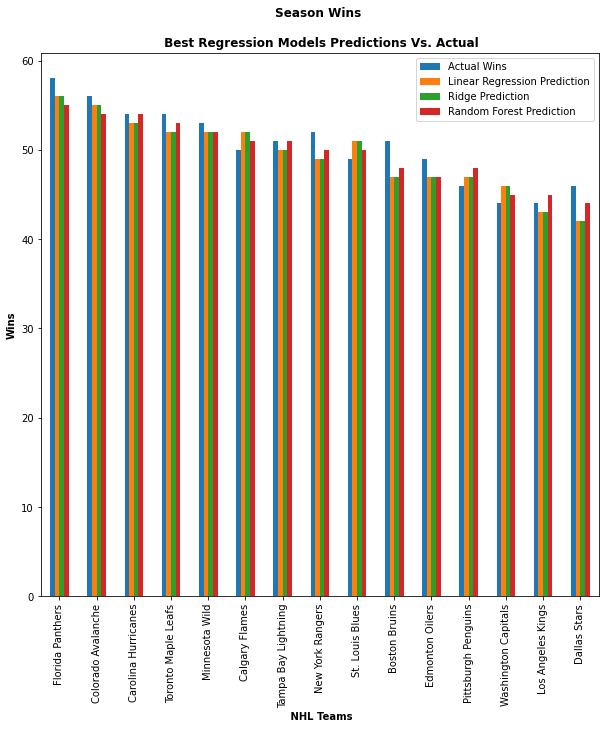

In [154]:
# plotting best regression models to observe the results more clearly

plotdata = pd.DataFrame({
    "Actual Wins": team_stats_2021_2022['Wins'][:15].tolist(),
    "Linear Regression Prediction": team_stats_2021_2022['Linear Regression'][:15].tolist(),
    'Ridge Prediction' : team_stats_2021_2022['Ridge Regression'][:15].tolist(),
    'Random Forest Prediction': team_stats_2021_2022['Random Forest Regression'][:15].tolist(),
    }, 
    index = team_stats_2021_2022['Team'][:15].tolist()
)

plotdata.plot(kind="bar", figsize=(10,10))
plt.title("Season Wins \n\n Best Regression Models Predictions Vs. Actual", fontweight="bold")
plt.xlabel(" NHL Teams", fontweight="bold")
plt.ylabel("Wins", fontweight="bold")

In [155]:
team_stats_2021_2022.set_index(['Team', 'Wins'], inplace=True) 
# Set index to 'Team, Wins' for clarity

# Creating a multi index with "Wins Predictions" as title of all columns

def add_top_column(df, top_col, inplace=False):
    if not inplace:
        df = df.copy()
    
    df.columns = pd.MultiIndex.from_product([[top_col], df.columns])
    return df

results = add_top_column(team_stats_2021_2022, "Wins Predictions")
results

Wins Predictions                   \
                           Linear Regression Ridge Regression   
Team                  Wins                                      
Florida Panthers      58                  56               56   
Colorado Avalanche    56                  55               55   
Carolina Hurricanes   54                  53               53   
Toronto Maple Leafs   54                  52               52   
Minnesota Wild        53                  52               52   
Calgary Flames        50                  52               52   
Tampa Bay Lightning   51                  50               50   
New York Rangers      52                  49               49   
St. Louis Blues       49                  51               51   
Boston Bruins         51                  47               47   
Edmonton Oilers       49                  47               47   
Pittsburgh Penguins   46                  47               47   
Washington Capitals   44                  46               46   
Los Angeles Kings     44                  43               43   
Dallas Stars          46                  42               42   
Nashville Predators   45                  43               43   
Vegas Golden Knights  43                  42               42   
Vancouver Canucks     40                  41               41   
Winnipeg Jets         39                  40               40   
New York Islanders    37                  38               38   
Columbus Blue Jackets 37                  36               36   
San Jose Sharks       32                  33               33   
Anaheim Ducks         31                  33               33   
Buffalo Sabres        32                  32               32   
Detroit Red Wings     32                  31               31   
Ottawa Senators       33                  32               32   
Chicago Blackhawks    28                  29               29   
New Jersey Devils     27                  28               28   
Philadelphia Flyers   25                  26               26   
Seattle Kraken        27                  26               26   
Arizona Coyotes       25                  24               24   
Montreal Canadiens    22                  23               23   

                                                                       \
                           Neural Network Regression Lasso Regression   
Team                  Wins                                              
Florida Panthers      58                          53               45   
Colorado Avalanche    56                          51               45   
Carolina Hurricanes   54                          46               44   
Toronto Maple Leafs   54                          50               44   
Minnesota Wild        53                          46               43   
Calgary Flames        50                          49               43   
Tampa Bay Lightning   51                          46               43   
New York Rangers      52                          46               43   
St. Louis Blues       49                          49               43   
Boston Bruins         51                          42               42   
Edmonton Oilers       49                          46               42   
Pittsburgh Penguins   46                          45               41   
Washington Capitals   44                          43               41   
Los Angeles Kings     44                          38               41   
Dallas Stars          46                          38               40   
Nashville Predators   45                          44               40   
Vegas Golden Knights  43                          39               40   
Vancouver Canucks     40                          39               39   
Winnipeg Jets         39                          41               39   
New York Islanders    37                          40               38   
Columbus Blue Jackets 37                          38               37   


In [156]:
evaluation = [{'Mean Absolute Error': 0.97,
              'Mean Squared Error': 1.41,
              'Median Squared Error': 0.85,
              'Explain Variance Score': 0.99,
              'R2 Score': 0.99},
            {'Mean Absolute Error': 1.33,
              'Mean Squared Error': 2.38,
              'Median Squared Error': 1.22,
              'Explain Variance Score': 0.98,
              'R2 Score': 0.98},
            {'Mean Absolute Error': 5.93,
              'Mean Squared Error': 45.23,
              'Median Squared Error': 6.17,
              'Explain Variance Score': 0.6,
              'R2 Score': 0.59},
            {'Mean Absolute Error': 3.86,
              'Mean Squared Error': 20.78,
              'Median Squared Error': 3.75,
              'Explain Variance Score': 0.81,
              'R2 Score': 0.81},
            {'Mean Absolute Error': 1.44,
              'Mean Squared Error': 3.0,
              'Median Squared Error': 1.0,
              'Explain Variance Score': 0.97,
              'R2 Score': 0.97},
            {'Mean Absolute Error': 1.22,
              'Mean Squared Error': 2.08,
              'Median Squared Error': 1.25,
              'Explain Variance Score': 0.98,
              'R2 Score': 0.98},
            {'Mean Absolute Error': 2.3,
              'Mean Squared Error': 8.45,
              'Median Squared Error': 1.9,
              'Explain Variance Score': 0.92,
              'R2 Score': 0.92},
            {'Mean Absolute Error': 2.3,
              'Mean Squared Error': 7.17,
              'Median Squared Error': 2.21,
              'Explain Variance Score': 0.94,
              'R2 Score': 0.93}]

# Then we pass this list of dictionaries into the DataFrame function
df = pd.DataFrame(evaluation, index=['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Neural Network', 'Decision Tree',
                                     'Random Forest', 'KNeighbors', 'Gaussian Regression'])
df


,Mean Absolute Error,Mean Squared Error,Median Squared Error,Explain Variance Score,R2 Score
Linear Regression,0.97,1.41,0.85,0.99,0.99
Ridge Regression,1.33,2.38,1.22,0.98,0.98
Lasso Regression,5.93,45.23,6.17,0.60,0.59
Neural Network,3.86,20.78,3.75,0.81,0.81
Decision Tree,1.44,3.00,1.00,0.97,0.97
Random Forest,1.22,2.08,1.25,0.98,0.98
KNeighbors,2.30,8.45,1.90,0.92,0.92
Gaussian Regression,2.30,7.17,2.21,0.94,0.93


## It appears that the Linear Regression model is most accurate based on the best score with regards to R2 score, MSE, and MAE which are the three dominant determinants in evaluating a regression prediction. Linear Regression, Ridge Regression, and Random Forest models are extremely close but Linear Regression outperforms them in all categories, including the three dominant.